## IMPORTING LIBRARIES

In [20]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log = pd.read_csv('keys.csv') #YOUR SECRET KEYS

In [3]:
consumer_key = log['Keys'][0]
consumer_key_secret = log['Keys'][1]
access_token = log['Keys'][3]
access_secret_token = log['Keys'][4]

In [4]:
auntheticate = tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auntheticate.set_access_token(access_token,access_secret_token)
api = tweepy.API(auntheticate)

In [5]:
def get_tweets():
    tweet_list = []
    keyword = input("Enter the hastag or id name: ")
    no_of_tweets = int(input("Enter the number of tweets: "))
    tweets = tweepy.Cursor(api.search_tweets,q = keyword,tweet_mode='extended').items(no_of_tweets)
    for tweet in tweets:
        tweet_list.append(tweet.full_text)
    return tweet_list

In [6]:
tweet_list = get_tweets()

Enter the hastag or id name: #RohitSharma
Enter the number of tweets: 2000


In [7]:
len(tweet_list)

2000

In [8]:
df = pd.DataFrame(tweet_list, columns=["Tweets"])

In [9]:
df.head(6)

,Tweets
0,RT @SonySportsNetwk: A valiant effort from the...
1,"RT @shubhankrmishra: what a champion player, f..."
2,RT @pathak__saab: #Hitman\n#RohitSharma\n\nhtt...
3,RT @pathak__saab: #Hitman\n#RohitSharma\n\nhtt...
4,RT @pathak__saab: #Hitman\n#RohitSharma\n\nhtt...
5,RT @Vinay_Kumar_R: Hats off to your commitment...


In [10]:
def clean_txt(txt):
    text = re.sub(r'@[A-Za-z0-9]+','',txt)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r"https?:\/\/\S+",'',text)
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text = emoj.sub(r'', text) # no emoji
    return text

In [11]:
df['Tweets'] = df['Tweets'].apply(clean_txt)
df.head(5)

,Tweets
0,: A valiant effort from the Hitman in vain \n\...
1,": what a champion player, fighter and characte..."
2,__saab: Hitman\nRohitSharma\n\n
3,__saab: Hitman\nRohitSharma\n\n
4,__saab: Hitman\nRohitSharma\n\n


In [14]:
def get_subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def get_polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [15]:
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

In [16]:
df.head(5)

,Tweets,Subjectivity,Polarity
0,: A valiant effort from the Hitman in vain \n\...,0.0,0.0
1,": what a champion player, fighter and characte...",0.1,0.0
2,__saab: Hitman\nRohitSharma\n\n,0.0,0.0
3,__saab: Hitman\nRohitSharma\n\n,0.0,0.0
4,__saab: Hitman\nRohitSharma\n\n,0.0,0.0


In [17]:
with open(r"./fonts/final_stopwords.txt",'r', encoding='utf8') as f:
    stopword = f.read()

In [18]:
import numpy as np
from PIL import Image
maskk = np.array(Image.open(r'cloud3.png'))

### MOST USED WORDS IN TWEETS

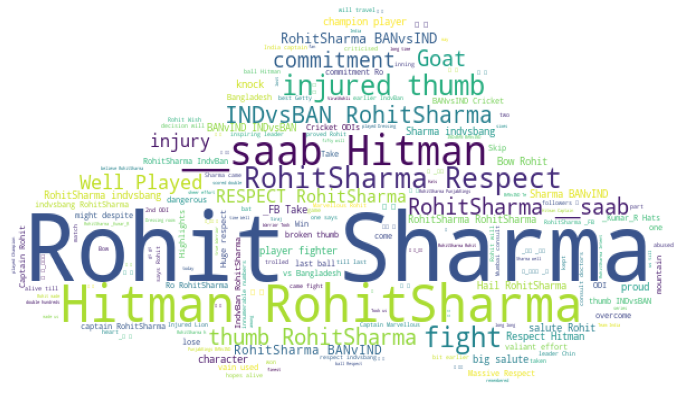

In [25]:
allwords = " ".join(df['Tweets'].values)
word_cloud = WordCloud(stopwords=STOPWORDS,width=500,height=500,mask = maskk, background_color='white',random_state=20,max_font_size=119,max_words=3000).generate(allwords)
plt.figure(figsize=(12,7))
plt.imshow(word_cloud,aspect="auto")
plt.axis('off')
plt.show()

In [26]:
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [27]:
df['Analysis'] = df['Polarity'].apply(get_analysis)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,: A valiant effort from the Hitman in vain \n\...,0.0,0.0,Neutral
1,": what a champion player, fighter and characte...",0.1,0.0,Neutral
2,__saab: Hitman\nRohitSharma\n\n,0.0,0.0,Neutral
3,__saab: Hitman\nRohitSharma\n\n,0.0,0.0,Neutral
4,__saab: Hitman\nRohitSharma\n\n,0.0,0.0,Neutral


In [32]:
def get_wordcloud(analysis):
    df_tweets = df[df['Analysis']==analysis]
    new_allwords = " ".join(df_tweets['Tweets'].values)
    word_cloud = WordCloud(stopwords=STOPWORDS,width=500,height=500,mask = maskk, background_color='white',random_state=20,max_font_size=119,max_words=4000).generate(new_allwords)
    plt.figure(figsize=(12,7))
    plt.imshow(word_cloud,aspect="auto")
    plt.axis('off')
    plt.show()

### MOST POSITIVE WORDS USED IN TWEETS

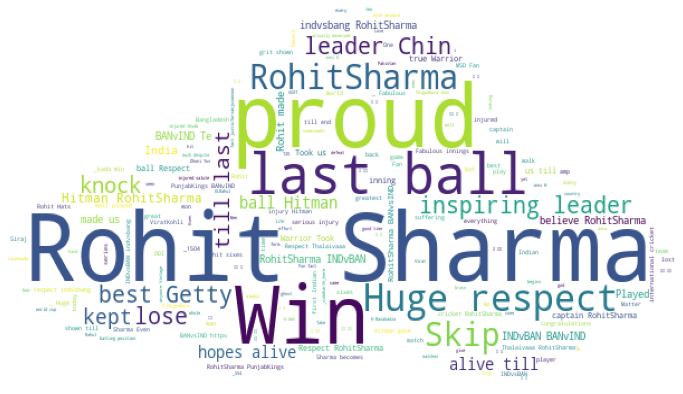

In [33]:
get_wordcloud("Positive")

### MOST NEUTRAL WORDS USED IN TWEETS

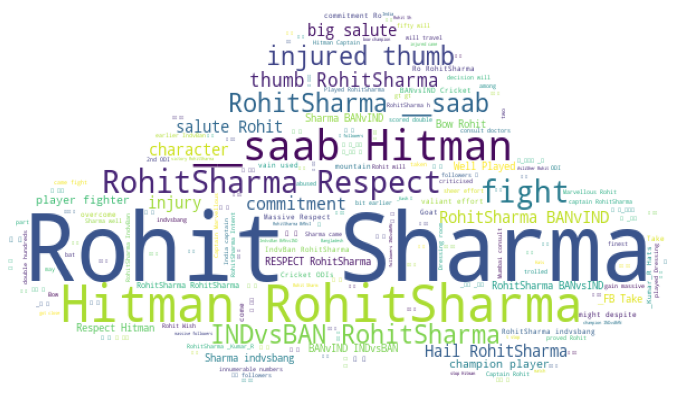

In [34]:
get_wordcloud("Neutral")

###  MOST NEGATIVE WORDS USED IN TWEETS

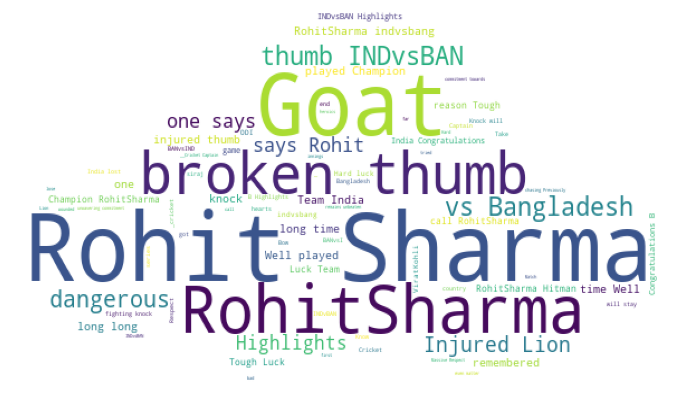

In [35]:
get_wordcloud("Negative")

### DISTRIBUTION OF POSISTIVE, NEUTRAL AND NEGATIVE SENTIMENTS

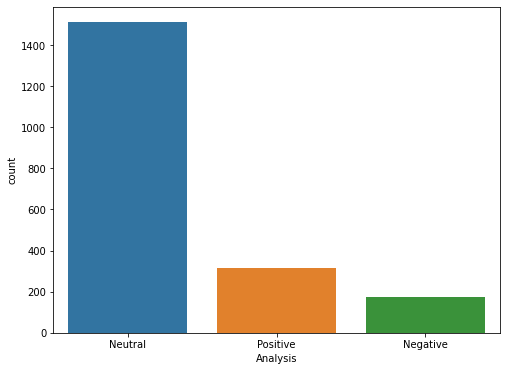

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x= df['Analysis'])
plt.show()

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Polarity', ylabel='Subjectivity'>

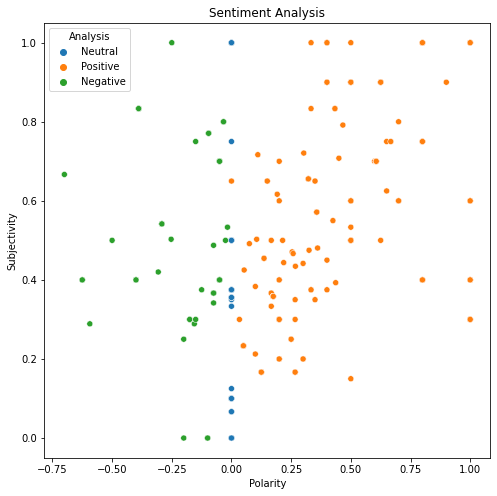

In [37]:
plt.figure(figsize=(8,8))
plt.title('Sentiment Analysis')
sns.scatterplot(x=df['Polarity'],y=df['Subjectivity'],hue=df["Analysis"])

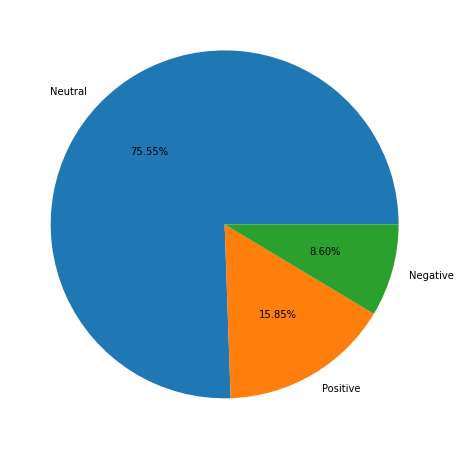

In [38]:
value = df['Analysis'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(value,labels = value.index,autopct='%1.2f%%')
plt.show()